### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm_notebook

### List of Directories

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'Basic Models - Using Pipe Line - Removing Genres which has one records.ipynb',
 'Basic Models - Using Pipe Line .ipynb',
 'Basic Models.ipynb',
 'Markdown File.pdf',
 'movies_metadata.csv',
 'Visualization_Movies_Data.ipynb']

### Read the data

In [3]:
meta_data = pd.read_csv("movies_metadata.csv")

In [4]:
meta_data.shape
print("meta_data we have %s rows and %s Columns "%(meta_data.shape[0],meta_data.shape[1]))

meta_data we have 45466 rows and 24 Columns 


In [5]:
meta_data.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [6]:
data = meta_data.loc[:, ['original_title','title','tagline','overview','genres']] 

In [7]:
data.head(5)

,original_title,title,tagline,overview,genres
0,Toy Story,Toy Story,NaN,"Led by Woody, Andy's toys live happily in his ...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
1,Jumanji,Jumanji,Roll the dice and unleash the excitement!,When siblings Judy and Peter discover an encha...,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,Grumpier Old Men,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,A family wedding reignites the ancient feud be...,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ..."
3,Waiting to Exhale,Waiting to Exhale,Friends are the people who let you be yourself...,"Cheated on, mistreated and stepped on, the wom...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
4,Father of the Bride Part II,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,Just when George Banks has recovered from his ...,"[{'id': 35, 'name': 'Comedy'}]"


In [8]:
data.shape

(45466, 5)

In [9]:
data.isnull().sum()

original_title        0
title                 6
tagline           25054
overview            954
genres                0
dtype: int64

In [10]:
import ast
data['genres'] = data['genres'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x,list) else [])

In [11]:
data.head()

,original_title,title,tagline,overview,genres
0,Toy Story,Toy Story,NaN,"Led by Woody, Andy's toys live happily in his ...","[Animation, Comedy, Family]"
1,Jumanji,Jumanji,Roll the dice and unleash the excitement!,When siblings Judy and Peter discover an encha...,"[Adventure, Fantasy, Family]"
2,Grumpier Old Men,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,A family wedding reignites the ancient feud be...,"[Romance, Comedy]"
3,Waiting to Exhale,Waiting to Exhale,Friends are the people who let you be yourself...,"Cheated on, mistreated and stepped on, the wom...","[Comedy, Drama, Romance]"
4,Father of the Bride Part II,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,Just when George Banks has recovered from his ...,[Comedy]


In [12]:
genres = data['genres']
unique_genres =sum(genres,[])
unique = len(set(unique_genres))

In [13]:
import nltk
genres_u = nltk.FreqDist(unique_genres)
all_genres_df = pd.DataFrame({'Genre': list(genres_u.keys()),'Count': list(genres_u.values())})
g = all_genres_df.nlargest(columns="Count",n=unique)

In [14]:
g = pd.DataFrame(g)

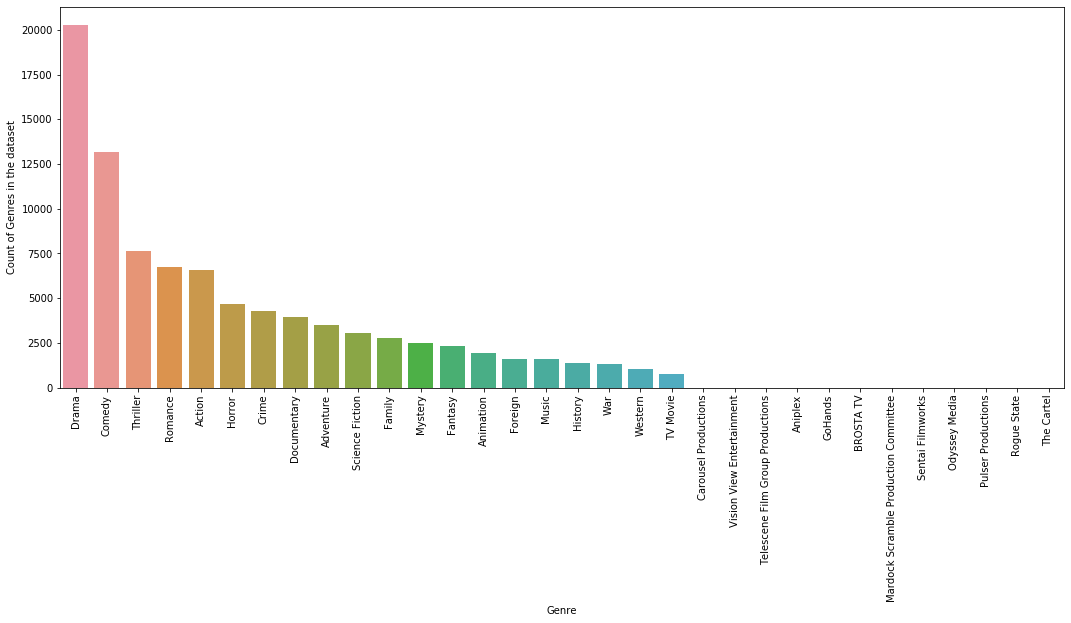

In [15]:
import seaborn as sns
x = ['Drama','Comedy','Thriller','Romance','Action','Horror','Crime','Documentary','Adventure','Science Fiction','Family','Mystery',
     'Fantasy','Animation','Foreign','Music','History','War','Western','TV Movie','Carousel Productions','Vision View Entertainment',
     'Telescene Film Group Productions','Aniplex','GoHands','BROSTA TV','Mardock Scramble Production Committee','Sentai Filmworks',
     'Odyssey Media','Pulser Productions','Rogue State','The Cartel']
plt.figure(figsize=(18,7))
ax=sns.barplot(x = "Genre",y = "Count",data = g)
ax.set(ylabel = 'Count of Genres in the dataset')
ax.set_xticklabels(labels = x ,rotation=90)
plt.show()

In [16]:
# e = final_data["Movie_name"].tolist()
# from textblob import TextBlob
# for i in tqdm_notebook(range(len(e))):
#     #print(e[i])
#     de_blob = TextBlob(e[i])
#     e[i] = de_blob.translate(to='en')
# Scratch - for converting the other languages to English Languages
# from textblob import TextBlob
# de_blob = TextBlob(u"Pasqualino Settebellezze")
# de_blob.detect_language()
# de_blob.translate(to='en')

In [17]:
data.dropna(subset = ['overview'],inplace=True,axis=0)

In [18]:
data['overview'].isnull().sum()

0

In [19]:
d = data["overview"].tolist()

In [20]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer,LancasterStemmer 
from nltk.tokenize import word_tokenize
for i in tqdm_notebook(range(0,len(d))):
    d[i] = re.sub(r'[^\w]',r' ',d[i])
    d[i] = re.sub(r'[0-9]',r' ',d[i])
    d[i] = d[i].lower()
    d[i] = d[i].split()
    #porter = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    #lancaster = LancasterStemmer()
    d[i] = [lemmatizer.lemmatize(word) for word in d[i]]
    d[i] = " ".join(d[i])
    d[i] = word_tokenize(d[i])
    stop_words = stopwords.words('english')
    d[i] = [word for word in d[i] if word not in stop_words]
    d[i] = ' '.join(d[i])
data['clean_text'] = d

In [21]:
e = data['clean_text'].tolist()

In [22]:
for i in tqdm_notebook(range(0,len(e))):
    e[i] = re.sub(r'\W*\b\w{1,2}\b',r' ',e[i])
    re_words = ["world","young","friend","story","brother","father","woman"]
    e[i] = word_tokenize(e[i])
    e[i] = [word for word in e[i] if word not in re_words]
    e[i] = ' '.join(e[i])
data['clean_text'] = e

In [23]:
data['clean_text']

0        led woody andy toy live happily room andy birt...
1        sibling judy peter discover enchanted board ga...
2        family wedding reignites ancient feud next doo...
3        cheated mistreated stepped holding breath wait...
4        george bank recovered daughter wedding receive...
                               ...                        
45461                                   rising falling man
45462    artist struggle finish work storyline cult pla...
45463    one hit wrong professional assassin end suitca...
45464    small town live two one minister one hunchback...
45465    year decriminalisation homosexuality director ...
Name: clean_text, Length: 44512, dtype: object

In [24]:
final_data = data.loc[:, ['clean_text','genres']] 

In [25]:
final_data.head(3)

,clean_text,genres
0,led woody andy toy live happily room andy birt...,"[Animation, Comedy, Family]"
1,sibling judy peter discover enchanted board ga...,"[Adventure, Fantasy, Family]"
2,family wedding reignites ancient feud next doo...,"[Romance, Comedy]"


In [26]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb= MultiLabelBinarizer()

In [27]:
final_data = final_data.join(pd.DataFrame(mlb.fit_transform(final_data['genres']),columns=mlb.classes_,index=final_data.index))

In [28]:
final_data.columns

Index(['clean_text', 'genres', 'Action', 'Adventure', 'Animation', 'Aniplex',
       'BROSTA TV', 'Carousel Productions', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Foreign', 'GoHands', 'History', 'Horror',
       'Mardock Scramble Production Committee', 'Music', 'Mystery',
       'Odyssey Media', 'Pulser Productions', 'Rogue State', 'Romance',
       'Science Fiction', 'Sentai Filmworks', 'TV Movie',
       'Telescene Film Group Productions', 'The Cartel', 'Thriller',
       'Vision View Entertainment', 'War', 'Western'],
      dtype='object')

In [29]:
final_data["target"] = final_data['Action']+final_data['Adventure']+final_data['Animation']+final_data['Aniplex']+final_data['BROSTA TV']+final_data['Carousel Productions']+final_data['Comedy']+final_data['Crime']+final_data['Documentary']+final_data['Drama']+final_data['Family']+final_data['Fantasy']+final_data['Foreign']+final_data['GoHands']+final_data['History']+final_data['Horror']+final_data['Mardock Scramble Production Committee']+final_data['Music']+final_data['Mystery']+final_data['Odyssey Media']+final_data['Pulser Productions']+final_data['Rogue State']+final_data['Romance']+final_data['Science Fiction']+final_data['Sentai Filmworks']+final_data['TV Movie']+final_data['Telescene Film Group Productions']+final_data['The Cartel']+final_data['Thriller']+final_data['Vision View Entertainment']+final_data['War']+final_data['Western']

In [30]:
final_data['target']

0        3
1        3
2        2
3        3
4        1
        ..
45461    2
45462    1
45463    3
45464    0
45465    0
Name: target, Length: 44512, dtype: int32

In [31]:
final_data.shape

(44512, 35)

In [32]:
final_data.columns

Index(['clean_text', 'genres', 'Action', 'Adventure', 'Animation', 'Aniplex',
       'BROSTA TV', 'Carousel Productions', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Foreign', 'GoHands', 'History', 'Horror',
       'Mardock Scramble Production Committee', 'Music', 'Mystery',
       'Odyssey Media', 'Pulser Productions', 'Rogue State', 'Romance',
       'Science Fiction', 'Sentai Filmworks', 'TV Movie',
       'Telescene Film Group Productions', 'The Cartel', 'Thriller',
       'Vision View Entertainment', 'War', 'Western', 'target'],
      dtype='object')

In [33]:
final_data.drop(['genres'],axis=1,inplace=True)
final_data.drop(['Carousel Productions'],axis=1,inplace=True)
final_data.drop(['Vision View Entertainment'],axis=1,inplace=True)
final_data.drop(['Telescene Film Group Productions'],axis=1,inplace=True)
final_data.drop(['BROSTA TV'],axis=1,inplace=True)
final_data.drop(['Mardock Scramble Production Committee'],axis=1,inplace=True)
final_data.drop(['Sentai Filmworks'],axis=1,inplace=True)
final_data.drop(['Odyssey Media'],axis=1,inplace=True)
final_data.drop(['Pulser Productions'],axis=1,inplace=True)
final_data.drop(['Rogue State'],axis=1,inplace=True)
final_data.drop(['The Cartel'],axis=1,inplace=True)
final_data.drop(['Aniplex'],axis=1,inplace=True)
final_data.drop(['GoHands'],axis=1,inplace=True)

In [34]:
final_data["Target"] = final_data['Action']+final_data['Adventure']+final_data['Animation']+final_data['Comedy']+final_data['Crime']+final_data['Documentary']+final_data['Drama']+final_data['Family']+final_data['Fantasy']+final_data['Foreign']+final_data['History']+final_data['Horror']+final_data['Music']+final_data['Mystery']+final_data['Romance']+final_data['Science Fiction']+final_data['TV Movie']+final_data['Thriller']+final_data['War']+final_data['Western']

In [35]:
final_data1 = final_data[final_data.Target != 0]
final_data1.shape

(42324, 23)

In [36]:
final_data1.reset_index(drop = True, inplace = True)

In [37]:
count = final_data1[['Action', 'Adventure', 'Animation','Comedy', 'Crime', 'Documentary','Drama', 'Family', 'Fantasy', 'Foreign','History', 'Horror',
        'Music', 'Mystery','Romance','Science Fiction', 'TV Movie','Thriller','War', 'Western']].sum(axis=0)
count = pd.DataFrame(count)
count.reset_index(level=0, inplace=True)
count.columns = ['Genre', 'Count']

In [38]:
count

,Genre,Count
0,Action,6565
1,Adventure,3470
2,Animation,1920
3,Comedy,12806
4,Crime,4269
5,Documentary,3886
6,Drama,20023
7,Family,2732
8,Fantasy,2290
9,Foreign,1599


Text(0.5, 0, 'Genres')

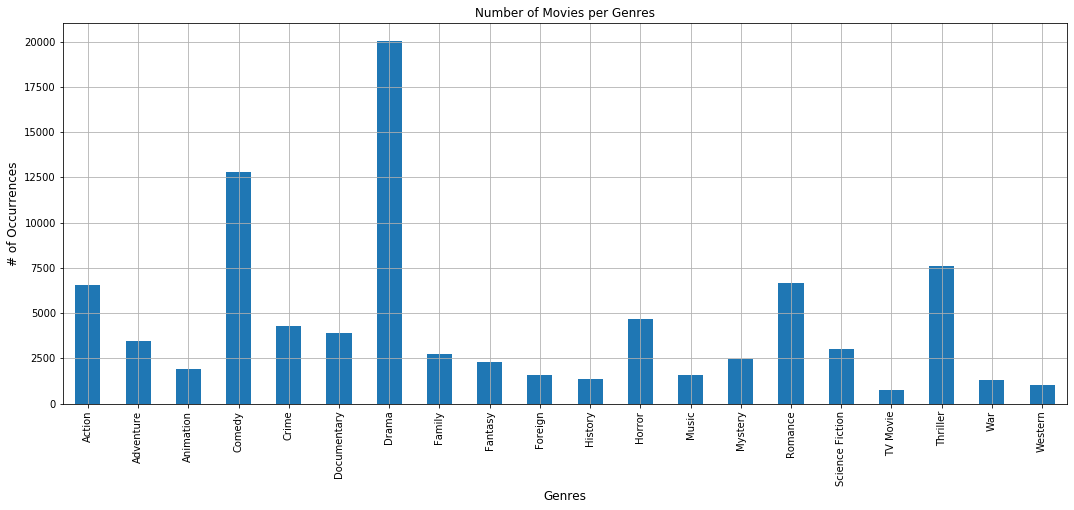

In [39]:
count.plot(x='Genre', y='Count', kind='bar', legend=False, grid=True, figsize=(18, 7))
plt.title("Number of Movies per Genres")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Genres', fontsize=12)

Text(0.5, 0, '# of Genres')

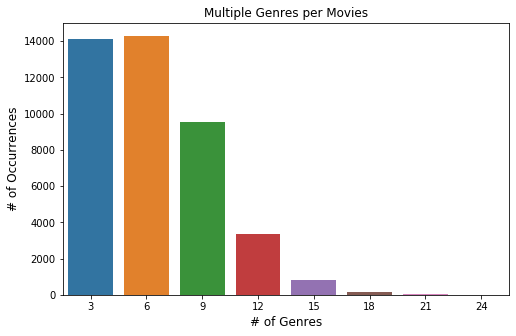

In [40]:
## How mnay movies have multi-labels(Genres)
rowsums = final_data1.iloc[:,1:].sum(axis=1)
x=rowsums.value_counts()

## Plot
plt.figure(figsize=(8,5))
ax = sns.barplot(x.index, x.values)
plt.title("Multiple Genres per Movies")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('# of Genres', fontsize=12)

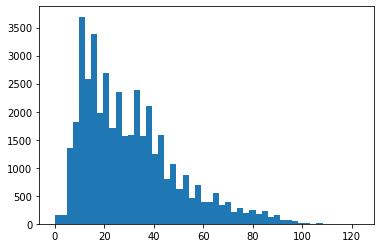

In [41]:
## Number of words in each sentence
sentence = final_data1["clean_text"].tolist()

plt.hist([len(s.split()) for s in sentence], bins = 50)
plt.show()

In [42]:
from sklearn.model_selection import train_test_split
genres = ['Action', 'Adventure', 'Animation','Comedy', 'Crime', 'Documentary','Drama', 'Family', 'Fantasy', 'Foreign','History', 'Horror',
        'Music', 'Mystery','Romance','Science Fiction', 'TV Movie','Thriller','War', 'Western']
train, test = train_test_split(final_data1, random_state = 42, test_size = 0.2, shuffle = True)

In [43]:
X_train = train.clean_text
X_test = test.clean_text
y_train = train[genres].values
y_test = test[genres].values
print("Shape of X_train",X_train.shape)
print("Shape of X_test",X_test.shape)
print("Shape of y_train",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train (33859,)
Shape of X_test (8465,)
Shape of y_train (33859, 20)
Shape of y_test (8465, 20)


In [44]:
stop_words = set(stopwords.words('english'))

### Naive Bayes Pipeline Model

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score
from sklearn.multiclass import OneVsRestClassifier
NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(max_features=1000,stop_words=stop_words)),
                ('clf', OneVsRestClassifier(MultinomialNB(
                    fit_prior=True, class_prior=None))),
            ])

predict_NB = pd.DataFrame()
for genre in genres:
    print('... Processing {}'.format(genre))
    # train the model using X_dtm & y
    NB_pipeline.fit(X_train, train[genre])
    # compute the testing accuracy
    train_prediction = NB_pipeline.predict(X_train).tolist()
    prediction = NB_pipeline.predict(X_test).tolist()
    print('Train f1_score is {}'.format(f1_score(train[genre], train_prediction)))
    print('Test f1_score is {}'.format(f1_score(test[genre], prediction)))
    predict_NB[genre] = prediction

... Processing Action
Train f1_score is 0.22650056625141562
Test f1_score is 0.2230971128608924
... Processing Adventure
Train f1_score is 0.027669386307201137
Test f1_score is 0.019363762102351315
... Processing Animation
Train f1_score is 0.04665825977301387
Test f1_score is 0.036939313984168866
... Processing Comedy
Train f1_score is 0.325974635979333
Test f1_score is 0.3036744609778318
... Processing Crime
Train f1_score is 0.14746543778801843
Test f1_score is 0.11499436302142052
... Processing Documentary
Train f1_score is 0.44497837578087457
Test f1_score is 0.42472582253240276
... Processing Drama
Train f1_score is 0.6668827170496159
Test f1_score is 0.6600051907604465
... Processing Family
Train f1_score is 0.020164986251145735
Test f1_score is 0.010327022375215145
... Processing Fantasy
Train f1_score is 0.020364415862808148
Test f1_score is 0.013186813186813187
... Processing Foreign
Train f1_score is 0.0
Test f1_score is 0.0
... Processing History
Train f1_score is 0.0
Test 

In [48]:
predict_NB

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8460,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8461,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8462,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8463,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


### Linear SVC Model

In [46]:
from sklearn.svm import LinearSVC
SVC_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(max_features=1000,stop_words=stop_words)),
                ('clf', OneVsRestClassifier(LinearSVC(), n_jobs=1)),
            ])

predict_SVC = pd.DataFrame()
for genre in genres:
    print('... Processing {}'.format(genre))
    # train the model using X_dtm & y
    SVC_pipeline.fit(X_train, train[genre])
    # compute the testing accuracy
    train_prediction = SVC_pipeline.predict(X_train).tolist()
    prediction = SVC_pipeline.predict(X_test).tolist()
    print('Train F1_Score is {}'.format(f1_score(train[genre],train_prediction)))
    print('Test F1_Score is {}'.format(f1_score(test[genre], prediction)))
    predict_SVC[genre] = prediction

... Processing Action
Train F1_Score is 0.4418634999347514
Test F1_Score is 0.40576615056059806
... Processing Adventure
Train F1_Score is 0.16406000638365784
Test F1_Score is 0.1425
... Processing Animation
Train F1_Score is 0.23516361619523016
Test F1_Score is 0.20370370370370372
... Processing Comedy
Train F1_Score is 0.530936403373761
Test F1_Score is 0.48088482808367405
... Processing Crime
Train F1_Score is 0.36805988771054277
Test F1_Score is 0.2820976491862568
... Processing Documentary
Train F1_Score is 0.6975061869407958
Test F1_Score is 0.667704280155642
... Processing Drama
Train F1_Score is 0.6914150197628459
Test F1_Score is 0.6709710089884796
... Processing Family
Train F1_Score is 0.26641074856046065
Test F1_Score is 0.22157434402332363
... Processing Fantasy
Train F1_Score is 0.15136718749999997
Test F1_Score is 0.1225296442687747
... Processing Foreign
Train F1_Score is 0.0
Test F1_Score is 0.0
... Processing History
Train F1_Score is 0.042992261392949274
Test F1_Scor

In [50]:
predict_SVC

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8460,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8461,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8462,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
8463,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


### LKogistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
LogReg_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(max_features=1000,stop_words=stop_words)),
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=1)),
            ])

predict_lr = pd.DataFrame()
for genre in genres:
    print('... Processing {}'.format(genre))
    # train the model using X_dtm & y
    LogReg_pipeline.fit(X_train, train[genre])
    # compute the testing accuracy
    train_prediction = LogReg_pipeline.predict(X_train).tolist()
    prediction = LogReg_pipeline.predict(X_test).tolist()
    print('Train f1_score is {}'.format(f1_score(train[genre], train_prediction)))
    print('Test F1_Score is {}'.format(f1_score(test[genre], prediction)))
    predict_lr[genre] = prediction

... Processing Action
Train f1_score is 0.4367271770586688
Test F1_Score is 0.39612486544671693
... Processing Adventure
Train f1_score is 0.19548407052273428
Test F1_Score is 0.16077953714981727
... Processing Animation
Train f1_score is 0.2047244094488189
Test F1_Score is 0.1619047619047619
... Processing Comedy
Train f1_score is 0.5241482590789966
Test F1_Score is 0.47809152872444016
... Processing Crime
Train f1_score is 0.3554810312303501
Test F1_Score is 0.28415300546448086
... Processing Documentary
Train f1_score is 0.6601437699680512
Test F1_Score is 0.6384364820846906
... Processing Drama
Train f1_score is 0.6909771811228539
Test F1_Score is 0.6724181679776706
... Processing Family
Train f1_score is 0.2546439628482972
Test F1_Score is 0.21238938053097345
... Processing Fantasy
Train f1_score is 0.1693121693121693
Test F1_Score is 0.1330724070450098
... Processing Foreign
Train f1_score is 0.0
Test F1_Score is 0.0
... Processing History
Train f1_score is 0.0717863105175292
Tes

In [51]:
predict_lr

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8460,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8461,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8462,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
8463,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
